# VizDoom Playground

In [11]:
import itertools as it
import json
import os

import cv2
import gym
from gym.spaces import Box, Discrete
import matplotlib.pyplot as plt
import numpy as np
import vizdoom as vzd

from rlpyt.envs.vizdoom.vizdoom_env import VizDoomEnv

vzd_dir = 'vizdoom_data'

## Player Control

In [ ]:
game = vzd.DoomGame()
game.load_config('vizdoom_data/my_way_home_control.cfg')
game.set_doom_scenario_path('vizdoom_data/my_way_home.wad')
game.set_screen_resolution(vzd.ScreenResolution.RES_640X480)
game.set_mode(vzd.Mode.SPECTATOR)
game.set_window_visible(True)

In [ ]:
game.get_screen_channels()

In [ ]:
game.init()
game.new_episode()
while not game.is_episode_finished():
    s = game.get_state()
    game.advance_action()
    a = game.get_last_action()
    r = game.get_last_reward()
game.close()

## Replay Episode

In [ ]:
game = vzd.DoomGame()
game.load_config('vizdoom_data/my_way_home_control.cfg')
game.init()
game.replay_episode('../data/local/20200722/vizdoom/run_0/eval_run_0_itr_0.lmp')
while not game.is_episode_finished():
    game.advance_action()
game.close()

## Cosine Similarity Exploration

In [ ]:
np.random.seed(333)

In [ ]:
env = VizDoomEnv('../experiments/vizdoom/my_way_home_SPTM.cfg', 0, [1040, -300], 270, grayscale=False)

In [ ]:
start_state = env.sample_states[0]

In [ ]:
start_state_features = start_state[0].flatten() / np.linalg.norm(start_state[0])

In [ ]:
similarities = []

In [ ]:
for state, position in env.sample_states:
    state_features = state.flatten() / np.linalg.norm(state)
    similarity = np.dot(start_state_features, state_features)
    similarities.append((*position, similarity))
#     plt.figure(figsize=(7, 7))
#     plt.imshow(np.transpose(state, [1, 2, 0]))
#     plt.title('{} {}: {}'.format(*position, similarity))

In [ ]:
similarities = np.array(similarities)

In [ ]:
plt.figure(figsize=(7, 7))
env.plot_topdown()
plt.scatter(similarities[:, 0], similarities[:, 1], c=range(len(similarities)), s=100)
plt.colorbar()

## MyWayHome

In [12]:
env = VizDoomEnv('../experiments/vizdoom/my_way_home_SPTM.cfg', 0, [1040, -300], 270, grayscale=False)

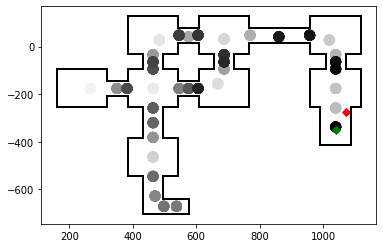

In [13]:
env.plot_topdown()
plt.scatter(env.sample_sectors[:, 0], env.sample_sectors[:, 1], c=env.sample_sectors[:, 2], s=100)

In [ ]:
for state, position in env.sample_states:
    plt.figure(figsize=(7, 7))
    plt.imshow(np.transpose(state, [1, 2, 0]))
    plt.title('{} {}'.format(*position))

In [ ]:
obs = env.reset()

In [ ]:
env.plot_topdown()

In [ ]:
plt.imshow(env.goal_state[-1], cmap='gray')

In [ ]:
env.plot_topdown()

In [ ]:
state = env.state

In [ ]:
state.sectors[0].lines[5].y2

In [ ]:
env.goal_position

In [ ]:
env.game.get_game_variable(vzd.GameVariable.ANGLE)

In [ ]:
env.game.send_game_command("warp 200 -200")

In [ ]:
obs, reward, done, info = env.step(3)

In [ ]:
done

In [ ]:
env.state.game_variables

In [ ]:
plt.imshow(obs[-1], cmap='gray')

In [ ]:
for i in range(500):
    obs, reward, done, info = env.step(np.random.randint(3))
    if done:
        print(reward, i + 1)
        break

In [ ]:
env.plot_topdown()

In [ ]:
plt.imshow(env.visited.T, origin='lower')